In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
!pip install yfinance
import yfinance as yf

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [3]:
adbe = 'ADBE'

In [4]:
adbe_df = yf.download(adbe)

[*********************100%***********************]  1 of 1 completed


In [5]:
adbe_df['Returns'] = adbe_df["Adj Close"].pct_change()

In [6]:
adbe_df.drop(["Open","High", "Low", "Close", "Adj Close", "Volume"], axis=1, inplace=True)

In [7]:
adbe_df

,Returns
Date,
1986-08-13,NaN
1986-08-14,0.055552
1986-08-15,-0.017543
1986-08-18,-0.035712
1986-08-19,0.018517
...,...
2022-06-24,0.029418
2022-06-27,-0.017152
2022-06-28,-0.040517


In [8]:
adbe_df = adbe_df.reset_index(drop=True).dropna()

In [9]:


adbe_df2 = adbe_df * adbe_df

result = pd.concat([adbe_df, adbe_df, adbe_df], axis=1)

In [10]:
result

,Returns,Returns,Returns
1,0.055552,0.055552,0.055552
2,-0.017543,-0.017543,-0.017543
3,-0.035712,-0.035712,-0.035712
4,0.018517,0.018517,0.018517
5,0.000000,0.000000,0.000000
...,...,...,...
9039,0.029418,0.029418,0.029418
9040,-0.017152,-0.017152,-0.017152
9041,-0.040517,-0.040517,-0.040517
9042,0.007849,0.007849,0.007849


In [11]:
iris = result


In [12]:
x_reduced = PCA(n_components=3).fit_transform(iris)

/Users/pdenormandie/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


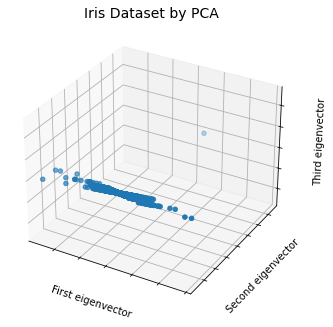

In [13]:
fig = plt.figure()
axes = Axes3D(fig)
axes.set_title("Iris Dataset by PCA", size=14)
axes.set_xlabel("First eigenvector")
axes.set_ylabel("Second eigenvector")
axes.set_zlabel("Third eigenvector")
axes.w_xaxis.set_ticklabels(())
axes.w_yaxis.set_ticklabels(())
axes.w_zaxis.set_ticklabels(())
axes.scatter(x_reduced[:,0],x_reduced[:,1],x_reduced[:,2])

/Users/pdenormandie/opt/anaconda3/envs/dev/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Populating the interactive namespace from numpy and matplotlib


/Users/pdenormandie/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/pdenormandie/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


AttributeError: 'Figure' object has no attribute 'set_color'

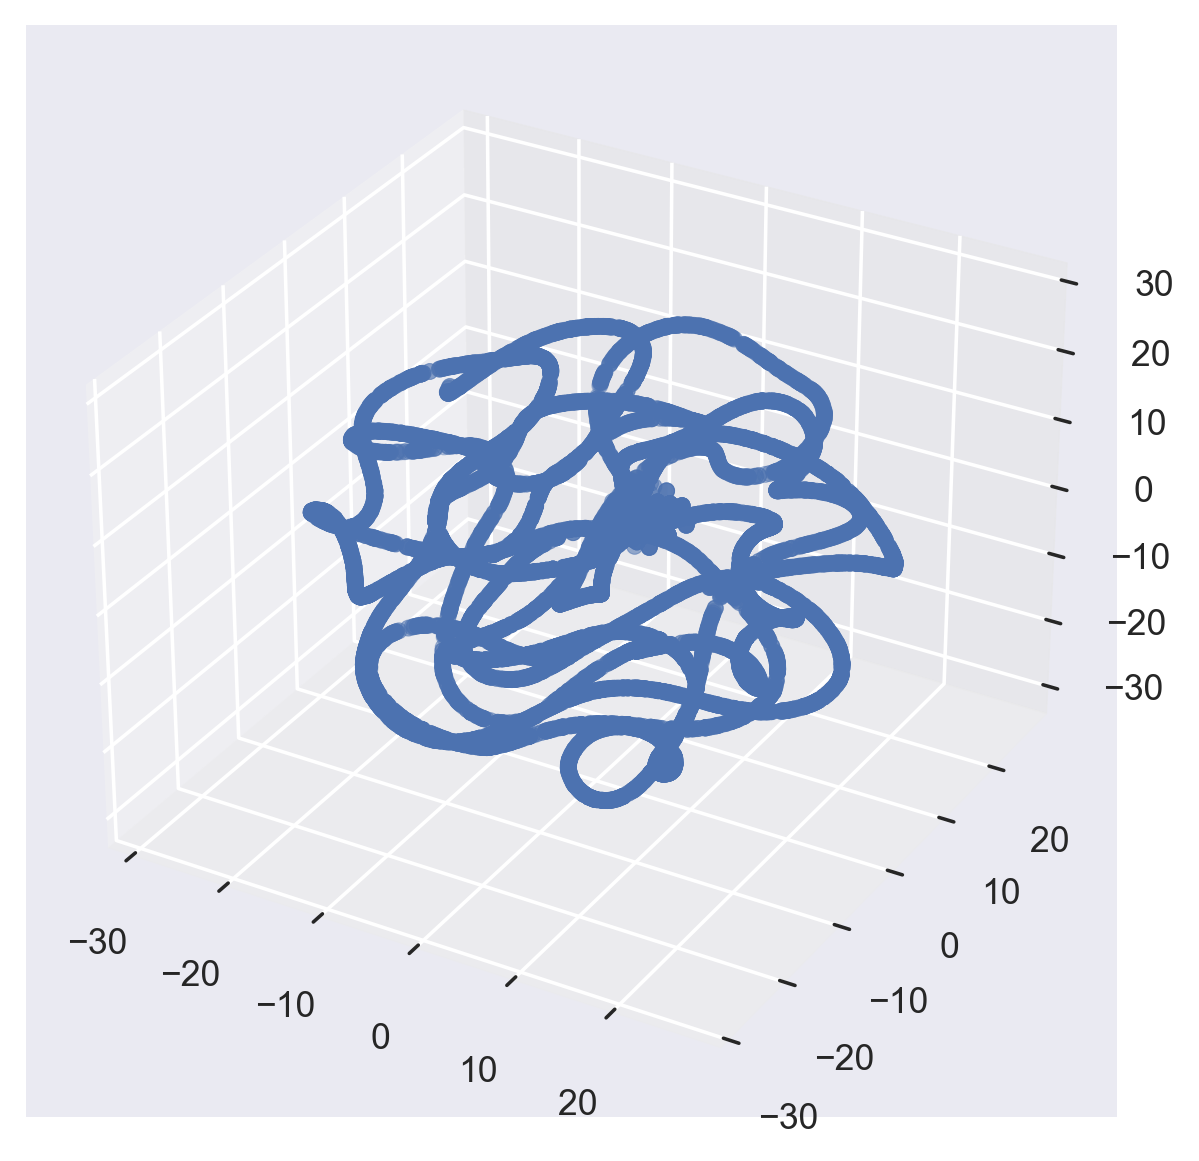

In [14]:
# imports from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
%matplotlib inline
%pylab inline
import matplotlib
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
matplotlib.style.use("seaborn")




#TSNE(3)
data = TSNE(n_components=3, random_state=0).fit_transform(x_reduced)
x, y, z = list(zip(*data))

fig = pylab.figure(dpi=256)
somefunc=fig.get_size_inches()
fig.set_figheight(somefunc[0])
fig.set_figwidth(somefunc[1])
ax = fig.add_subplot(111, projection = '3d')
sc = ax.scatter(x, y, z)
fig.set_color(color= ['black', 'blue', 'green'])
fig.savefig("adbe.png")


In [ ]:
def plot_slices(num_rows, num_columns, width, height, data):
    """Plot a montage of 20 CT slices"""
    #data = np.rot90((data))
    #data = np.transpose(data)
    #data = np.reshape(data, (num_rows, num_columns, width, height))
    rows_data, columns_data = data.shape[0], data.shape[1]
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]
    fig_width = 12.0
    fig_height = fig_width * sum(heights) / sum(widths)
    f, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={"height_ratios": heights},
    )
    for i in range(rows_data):
        for j in range(columns_data):
            axarr[i, j].imshow(data[i][j], cmap="gray")
            axarr[i, j].axis("off")
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()


In [ ]:
import numpy as np
import imageio
import math
from pprint import pprint
images = []
for n in range(0, 1):
    #if n >= somefunc[1] / 90:
        #ax.azim = ax.azim+1.1
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image_array = image.reshape(int(somefunc[0]) * 256, int(somefunc[1]) * 256, 3, 1)
    #images.append(image_array)
    print(image_array.shape)
    display(plot_slices(math.floor(sqrt(somefunc[0]*256)), math.floor(sqrt(somefunc[0]*256)), int(somefunc[0]) * 256, int(somefunc[1]) * 256, image_array))
    #imageio.imsave(f'stringimage_{n}.png', image_array)
    #pprint(len(image_array))
#imageio.mimsave("adbe.gif", images)

In [ ]:
from PIL import Image
adbe123 = Image.open(r'stringimage_1.png')
splitimage = Image.Image.split(adbe123)
for image in splitimage: 
    image.show()

In [ ]:
#opencv?